## Likelihood(MLE와MAP)

머신러닝 모델의 역할은 무엇인가?   
우리는 데이터를 통해 그 데이터가 따르는 확률 분포를 알고자 한다.   
데이터의 분포를 알고 있다면 새로운 데이터가 입력되더라도 그 출력값을 추정할 수 있다.   

결국 파라미터에 의해 결정되는 머신러닝 모델을 만든 다음 파라미터 값을 조정하여   
간접적으로 데이터의 분포를 확인할 있다.   
정확한 데이터의 분포를 알 수 없지만 최적의 파라미터 값을 찾아서 최대한 가까운 분포를   
알아낼 수 있다.

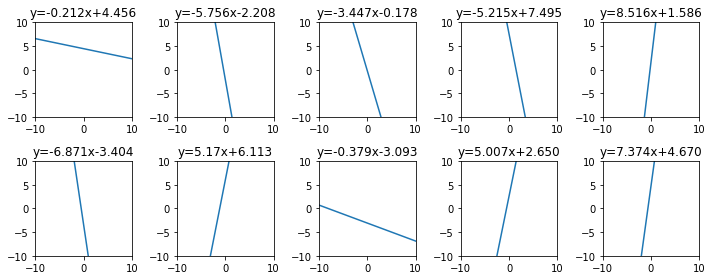

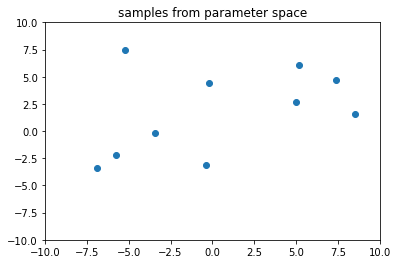

In [1]:
# 확률변수로서의 모델 파라미터
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

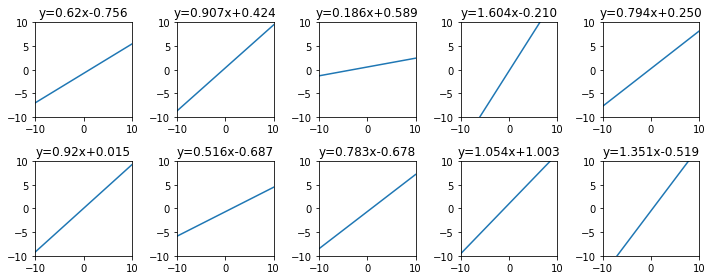

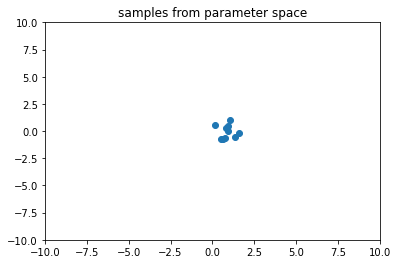

In [2]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    # 평균이 (1, 0)이고, 표준편차가 0.5
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

사전확률(prior): 데이터 관찰 전 파라미터 공간에 주어진 확률 분포
가능도(likelihood): 파라미터 분포가 정해졌을 때 데이터가 관찰될 가능성   
likelihood가 높을 수록 우리가 지정된 파라미터 조건에서 데이터가 관찰될 확률이 높다,   
데이터 분포를 잘 표현하고 있다.   
likelihood값을 최대화하는 방향을 모델을 학습시키는 방법을 최대 가능도 추정(MLE)   
사후확률(posterior): 데이터 집합이 주어졌을 때 파라미터의 분포를 계산
posterior를 최대화하는 방향으로 모델을 학습시키는 방법을 최대 사후 확률 추정(MAP)

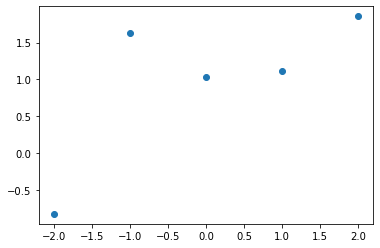

In [3]:
# likelihood
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

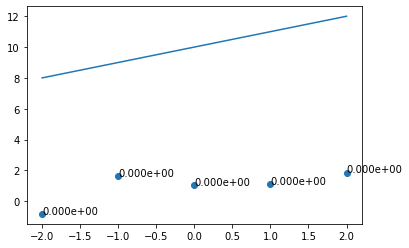

In [9]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 10
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

# 모델에서 멀어질수록 likelihood값이 감소한다.

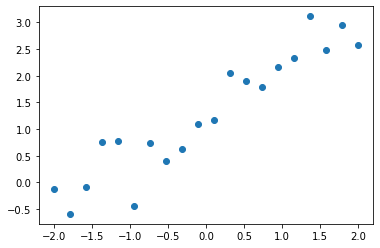

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

# 노이즈 분포는 평균이 0이고 표준편차가 0.5인 정규분포
# y=x+1를 기준
input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


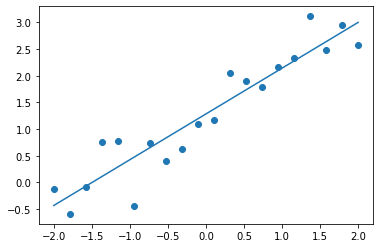

In [11]:
# MLE의 최적 파라미터 계산하기
# 실제는 원래의 표준편차는 모르기 때문에 0.1로 가정하여 계산한다.
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

# 원래 함수와 근사하게 나온다.
# y = x + 1
# y = 0.8578x + 1.2847

MLE의 최적해는 오로지 관측된 데이터 값에만 의존한다.   
관측된 데이터에 노이즈가 많을 경우, 이상치 데이터가 존재하는 경우 모델의 안정성이 떨어진다.   
MAP: 데이터셋이 주어졌을 때 파라미터의 분포, 확률값을 최대화하는 파라미터 찾기
     '이런 데이터가 있을 때 파라미터의 값이 무엇일 확률이 제일 높은가?
MAP는 MLE와 비슷하지만 정규화 항에 해당하는 negative log prior부분이 존재한다.   
그래서 MLE모델보다 MAP모델이 더 안정적이란 얘기?

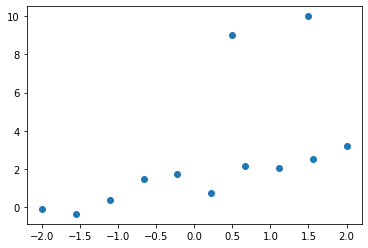

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

# y=X+1
# 이상치 데이터 (0.5, 9), (1.5, 10) 추가
input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


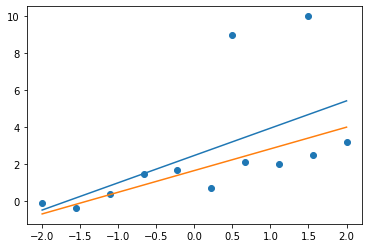

In [13]:
# 노이즈 분포의 표준편차 0.1, 파라미터 분포의 표준편차 0.04로 가정
# 정규화 상수는 파라미터 분포의 표준편차의 제곱에 반비례
# 파라미터 분포의 표준편차가 작을수록 파라미터 값에 대한 제약 조건을 강하게 걸어주는 것

def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

# MLE는 이상치 데이터까지 포함한 negative log likelihood를 감소시키기 위해
# 직선이 위로 치우쳐서 아래쪽 10개 데이터의 경향성에서 벗어났다.
# MAP는 이상치 데이터가 추가되어도 아래쪽 데이터에서 크게 벗어나지 않는다.